# Defining the Question

## a) Specifying the Question

The objective is to build a model that predicts results of a game between team 1 and team 2 based on who's home and who's away, and on whether or not the game is friendly. 

## b) Defining the Metric for Success

Predicting the results of the matches with an accuracy of over 80% will be deemed successful.

## c) Understanding the context

As the analyst, the research problem is to figure out which model can predict results of a game between team 1 and team 2 based on who's home and who's away, and on whether or not the game is friendly.

## d) Recording the Experimental Design

1) Reading the Data 

2) Checking the Data 

3) Tidying the Dataset

4) Merging the Datasets

4) Perform Exploratory Descriptive  Analysis

5) Create and test the models to use 

6) Conclusions and recommendations

## e) Data Relevance

Datasets have been provided with the right data on the rankings and results of different matches played by different teams both home and away. 

#  1) Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  2) Loading the Datasets

In [ ]:
#import fifa dataset
Fifa_Rankings= pd.read_csv('/content/Fifa.csv')


#import the results dataset
Results= pd.read_csv('/content/Results.csv')


## i) Fifa Rankings Dataset

In [ ]:
#preview the top of the dataset
Fifa_Rankings.head(4)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993


In [ ]:
#Explore the dataset
Fifa_Rankings.shape

(57793, 16)

The dataset shows over 5000 countries which is unrealistic. That will be sorted by cleaning the data.

In [ ]:
#Check the descriptive statistics of the dataset
Fifa_Rankings.describe

<bound method NDFrame.describe of        rank country_full country_abrv  total_points  previous_points  \
0         1      Germany          GER           0.0               57   
1         2        Italy          ITA           0.0               57   
2         3  Switzerland          SUI           0.0               50   
3         4       Sweden          SWE           0.0               55   
4         5    Argentina          ARG           0.0               51   
...     ...          ...          ...           ...              ...   
57788   206     Anguilla          AIA           0.0                0   
57789   206      Bahamas          BAH           0.0                0   
57790   206      Eritrea          ERI           0.0                0   
57791   206      Somalia          SOM           0.0                0   
57792   206        Tonga          TGA           0.0                0   

       rank_change  cur_year_avg  cur_year_avg_weighted  last_year_avg  \
0                0         

## ii) Results Dataset

In [ ]:
#Preview the top of the dataset
Results.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False


In [ ]:
#Explore the dataset
Results.shape

(40839, 9)

In [ ]:
#Check the descriptive analysis of the dataset
Results.describe

<bound method NDFrame.describe of              date         home_team        away_team  home_score  away_score  \
0      1872-11-30          Scotland          England           0           0   
1      1873-03-08           England         Scotland           4           2   
2      1874-03-07          Scotland          England           2           1   
3      1875-03-06           England         Scotland           2           2   
4      1876-03-04          Scotland          England           3           0   
...           ...               ...              ...         ...         ...   
40834  18/07/2019    American Samoa           Tahiti           8           1   
40835  18/07/2019              Fiji  Solomon Islands           4           4   
40836  19/07/2019           Senegal          Algeria           0           1   
40837  19/07/2019        Tajikistan      North Korea           0           1   
40838  20/07/2019  Papua New Guinea             Fiji           1           1   

     

# 3) Cleaning the Datasets

In [ ]:
# disable future warnings by running this code
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



## i) Fifa Rankings Dataset

In [ ]:
# Check for null values

Fifa_Rankings.isnull().sum()


rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

There are no null values in the dataset

In [ ]:
#Check for duplicates in the dataset
Fifa_Rankings.duplicated().sum()

37

In [ ]:
#Drop the duplicates
Rankings= Fifa_Rankings.drop_duplicates()

#Check to see if changes have been effected
Rankings.shape

(57756, 16)

In [ ]:
#Certify the duplicates have been dropped
print('Number of duplicates after cleaning: ' +str(Rankings.duplicated().sum()))

Number of duplicates after cleaning: 0


The dataset no longer has duplicates

In [ ]:
#Drop unnecessary columns
Rankings = Rankings.drop(['total_points', 'previous_points', 'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted'], axis = 1)
Rankings.head(5)

,rank,country_full,country_abrv,confederation,rank_date
0,1,Germany,GER,UEFA,08/08/1993
1,2,Italy,ITA,UEFA,08/08/1993
2,3,Switzerland,SUI,UEFA,08/08/1993
3,4,Sweden,SWE,UEFA,08/08/1993
4,5,Argentina,ARG,CONMEBOL,08/08/1993


In [ ]:
#Change the rank_date column from object to date_time data type
#---
#Import the library
import datetime 

#Change the column datatype
Rankings["rank_date"] = Rankings["rank_date"].apply(pd.to_datetime) 

#Check that the changes have been effected 
print(Rankings.dtypes) 

rank                      int64
country_full             object
country_abrv             object
confederation            object
rank_date        datetime64[ns]
dtype: object


In [ ]:
#Rename 'country_full' to 'country' and 'rank_date' to 'date'
Rankings.rename(columns={'country_full':'country', 'rank_date':'date'}, inplace=True)

#Preview the changes
Rankings.head(3)

,rank,country,country_abrv,confederation,date
0,1,Germany,GER,UEFA,1993-08-08
1,2,Italy,ITA,UEFA,1993-08-08
2,3,Switzerland,SUI,UEFA,1993-08-08


In [ ]:
#Remove day from date and work with the month and year only 
Rankings['date'] = Rankings['date'].dt.strftime('%Y-%m')

#Preview the changes
Rankings.head(3)

,rank,country,country_abrv,confederation,date
0,1,Germany,GER,UEFA,1993-08
1,2,Italy,ITA,UEFA,1993-08
2,3,Switzerland,SUI,UEFA,1993-08


In [ ]:
#Explore the new dataset
Rankings.shape

(57756, 5)

The new dataset has 57756 rows from the initial 57793 rows and 5 columns from the initial 16 columns

##  ii) Results Dataset

In [ ]:
#Check for null values
Results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

There are no recorded null values in the dataset.

In [ ]:
#Check for duplicates
Results.duplicated().sum()

0

There are no recorded duplicates in the dataset

In [ ]:
#Drop the irrelevant columns 
Results.drop(['country','neutral', 'city'], axis=1, inplace=True)

#Preview changes
Results.tail(3)

,date,home_team,away_team,home_score,away_score,tournament
40836,2019-07,Senegal,Algeria,0,1,Other
40837,2019-07,Tajikistan,North Korea,0,1,Other
40838,2019-07,Papua New Guinea,Fiji,1,1,Other


In [ ]:
#Check the datatypes
Results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
dtype: object

In [ ]:
#Change the rank_date column from object to date_time data type
#---
#Import the library
import datetime 

#Change the column datatype
Results["date"] = Results["date"].apply(pd.to_datetime)

#Preview the changes
print(Results.dtypes)

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
dtype: object


The changes have been made successfully as the date is now in the correct data type.

In [ ]:
#Remove day from date and work with the month and year only
Results['date'] = Results['date'].dt.strftime('%Y-%m')

#Preview the changes
Results.head(3)

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11,Scotland,England,0,0,Friendly
1,1873-03,England,Scotland,4,2,Friendly
2,1874-03,Scotland,England,2,1,Friendly


In [ ]:
#Check the unique values under the column tournament
print(Results['tournament'].nunique())


2


The model will only train 2 features, which are 'friendly' and 'other'.

In [ ]:
#Convert values in the 'tournament' column to two categories- 'Friendly' and 'Other'

#Create a function to implement the change
def tournament_type (y):
    if y == 'Friendly':
        return 'Friendly'
    return 'Other'
    
#Commit the function to the 'tournament' column

Results['tournament'] = Results['tournament'].apply(lambda y: tournament_type(y))

#Preview the changes
Results.head(3)

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11,Scotland,England,0,0,Friendly
1,1873-03,England,Scotland,4,2,Friendly
2,1874-03,Scotland,England,2,1,Friendly


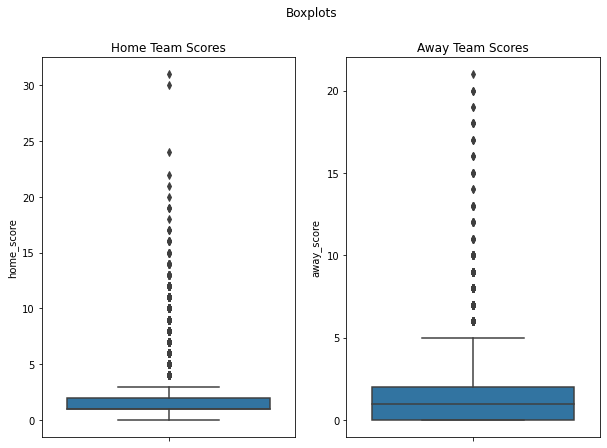

In [ ]:
#Check for outliers using boxplots
#---
#Create the size of the figure
fig, ax = plt.subplots(1,2, figsize=(10,7))

#Label the figure
fig.suptitle('Boxplots')

#Plot the home team scores boxplot
sns.boxplot(data=Results, y = "home_score", ax=ax[0])

#Label the home team scores boxplot
ax[0].set_title('Home Team Scores')

#Plot the Away team scores boxplot
sns.boxplot(data=Results, y = "away_score", ax=ax[1])

#Label the away team scores boxplot
ax[1].set_title('Away Team Scores')

#Display the figure
plt.show()

Since the dataset is large enough, the outliers will be retained as they will have no effect on the analysis.

In [ ]:
#Explore the new Dataset
Results.shape

(40839, 6)

The initial dataset had 40839 rows and 9 columns and the new dataset has  40839 rows and 6 columns.

# 4) Merging the Datasets

In [ ]:
# #Merge Rankings and Results datasets by home_team column
Home_Team = pd.merge(Results, Rankings, how = 'inner' , right_on =['date', 'country'], left_on = ['date', 'home_team'])

#Preview the merged datasets
Home_Team.head(3)

,date,home_team,away_team,home_score,away_score,tournament,rank,country,country_abrv,confederation
0,1993-08,Uganda,Tanzania,3,1,Friendly,104,Uganda,UGA,CAF
1,1993-09,Sierra Leone,Togo,0,0,Other,79,Sierra Leone,SLE,CAF
2,1993-10,Angola,Zimbabwe,1,1,Other,97,Angola,ANG,CAF


In [ ]:
#Explore the new dataset
Home_Team.shape

(18408, 10)

In [ ]:
#Rename rank to Home_team_rank to match the new dataset 
Home_Team.rename(columns={'rank':'home_team_rank'},inplace=True)

#Preview the changes
Home_Team.head(2)

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,country,country_abrv,confederation
0,1993-08,Uganda,Tanzania,3,1,Friendly,104,Uganda,UGA,CAF
1,1993-09,Sierra Leone,Togo,0,0,Other,79,Sierra Leone,SLE,CAF


In [ ]:
#Merge Home_team and Rankings datasets by away_team column
Merged_Games = pd.merge(Home_Team, Rankings, how = 'inner' , right_on =['date', 'country'], left_on = ['date', 'away_team'])

#Preview the merged datasets
Merged_Games.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,country_x,country_abrv_x,confederation_x,rank,country_y,country_abrv_y,confederation_y
21760,2018-12,United Arab Emirates,Kuwait,0,2,Friendly,81,United Arab Emirates,UAE,AFC,176,Kuwait,KUW,AFC
21761,2018-12,Yemen,Syria,0,1,Friendly,125,Yemen,YEM,AFC,76,Syria,SYR,AFC
21762,2018-12,Philippines,Vietnam,2,4,Friendly,113,Philippines,PHI,AFC,103,Vietnam,VIE,AFC


In [ ]:
#Explore the dataset
Merged_Games.shape

(21763, 14)

In [ ]:
#Rename the rank column to away_team_rank
Merged_Games.rename(columns={'rank':'away_team_rank'},inplace=True)

#Preview the changes
Merged_Games.tail(2)

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,country_x,country_abrv_x,confederation_x,away_team_rank,country_y,country_abrv_y,confederation_y
21761,2018-12,Yemen,Syria,0,1,Friendly,125,Yemen,YEM,AFC,76,Syria,SYR,AFC
21762,2018-12,Philippines,Vietnam,2,4,Friendly,113,Philippines,PHI,AFC,103,Vietnam,VIE,AFC


In [ ]:
# drop the 'country_x' and 'country_y' columns
Merged_Games.drop(['country_x', 'country_y', 'country_abrv_x', 'confederation_x','country_abrv_y', 'confederation_y'],axis=1, inplace=True)

#Preview changes
Merged_Games.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank
21760,2018-12,United Arab Emirates,Kuwait,0,2,Friendly,81,176
21761,2018-12,Yemen,Syria,0,1,Friendly,125,76
21762,2018-12,Philippines,Vietnam,2,4,Friendly,113,103


In [ ]:
#Preview new dataset
Merged_Games.tail(1)

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank
21762,2018-12,Philippines,Vietnam,2,4,Friendly,113,103


In [ ]:
#Export the merged dataset as a csv file
Merged_Games.to_csv('matches.csv', index=False)

#  5) Exploratory Data Analysis

##  i) Univariate Analysis

In [ ]:
#Display the total number of home teams 
print('The total number of home teams is ' +str(Merged_Games['home_team'].nunique()))

#Display the total number of away teams
print('The total number of away teams is ' +str(Merged_Games['away_team'].nunique()))

The total number of home teams is 194
The total number of away teams is 194


In [ ]:
#Check the descriptive statistics of both the home_score and away_score columns
Merged_Games[['home_score', 'away_score']].describe()

,home_score,away_score
count,21763.000000,21763.000000
mean,1.559068,1.063870
std,1.625842,1.236028
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,15.000000


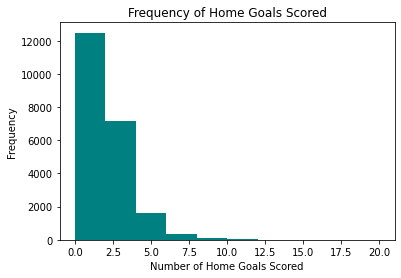

In [ ]:
# visualize the home scores using a countplot
plt.hist(Merged_Games['home_score'], bins= [0,2,4,6,8,10,12,14,16,18,20], rwidth = 4, color ='teal')

# Labelling our x axis
plt.xlabel("Number of Home Goals Scored")

# Labelling our y axis
plt.ylabel("Frequency")

# Giving a title to our Bar chart
plt.title("Frequency of Home Goals Scored")

# Displaying our chart
plt.show()

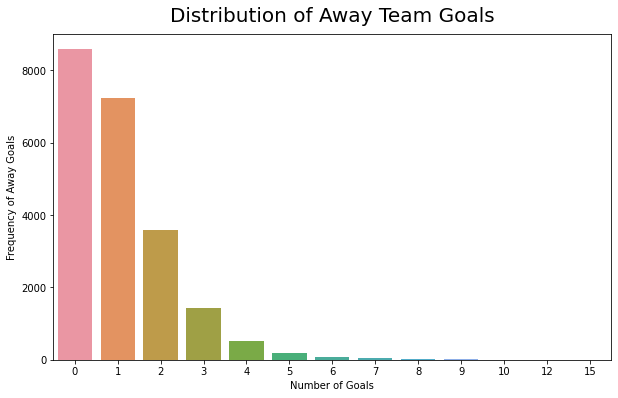

In [ ]:
# visualize the home scores using a countplot
plt.figure(figsize = (10, 6))

# plot the count plot
sns.countplot(Merged_Games.away_score)

# label the chart
plt.title('Distribution of Away Team Goals', fontsize=20, y=1.018)
# label the x axis
plt.xlabel('Number of Goals')
# label the y axis
plt.ylabel('Frequency of Away Goals')
# display the chart
plt.show()

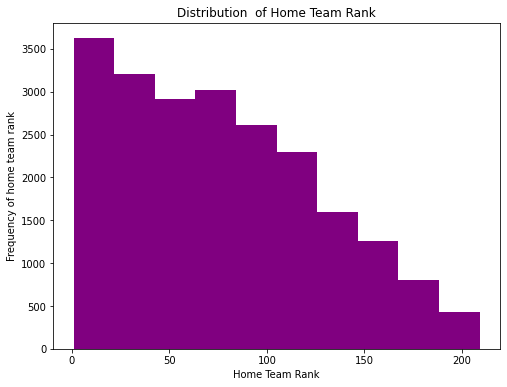

In [ ]:
#Visualize the home team rank using a countplot
plt.figure(figsize = (8, 6))

# Plotting the histogram
plt.hist(Merged_Games['home_team_rank'], bins= 10, rwidth = 5, color ='purple')

# Labelling our x axis
plt.xlabel("Home Team Rank")

# Labelling our y axis
plt.ylabel("Frequency of home team rank")

# Giving a title to our Bar chart
plt.title("Distribution  of Home Team Rank")

# Displaying our chart
plt.show()

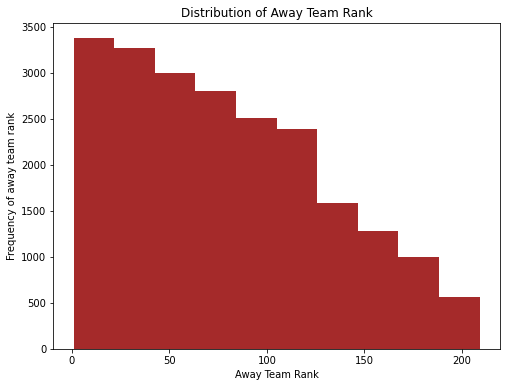

In [ ]:
#Visualize the away team rank using a countplot
plt.figure(figsize = (8, 6))

# Plotting the histogram
plt.hist(Merged_Games['away_team_rank'], bins= 10, rwidth = 4, color ='brown')

# Labelling our x axis
plt.xlabel("Away Team Rank")

# Labelling our y axis
plt.ylabel("Frequency of away team rank")

# Giving a title to our Bar chart
plt.title("Distribution of Away Team Rank")

# Displaying our chart
plt.show()

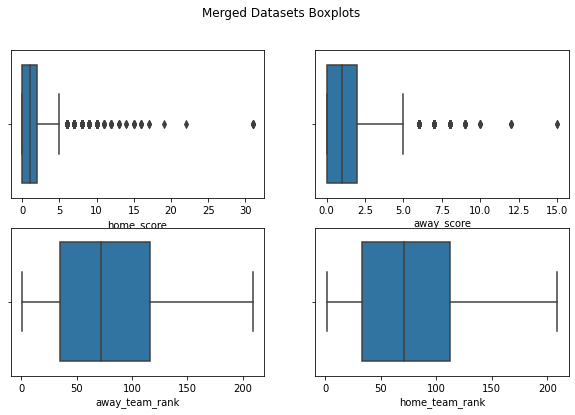

In [ ]:
# Checking for Outliers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 6))
fig.suptitle('Merged Datasets Boxplots') 

# Titles
sns.boxplot(Merged_Games['home_score'], ax=ax1)
sns.boxplot(Merged_Games['away_score'], ax=ax2)
sns.boxplot(Merged_Games['away_team_rank'], ax=ax3)
sns.boxplot(Merged_Games['home_team_rank'], ax=ax4)
plt.show()

In [ ]:
# Measures of central tendency
#---
# Find the mean
print('Home Team Score Mean:', round(Merged_Games["home_score"].mean()))
print('Away Team Score Mean:', round(Merged_Games["away_score"].mean()))
print('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')

# Find the median
print('Home Team Score Median:', round(Merged_Games["home_score"].median()))
print('Away Team Score Median:', round(Merged_Games["away_score"].median()))
print('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')

# Find the mode
print('Home Team Score Mode:', round(Merged_Games["home_score"].mode()))
print('Away Team Score Mode:', round(Merged_Games["away_score"].mode()))
print('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')

# Find the standard deviation
print('Home Team Score Standard Deviation:', round(Merged_Games["home_score"].std()))
print('Away Team Score Standard Deviation:', round(Merged_Games["away_score"].std()))
print('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')

# Find the quantiles
print('Home Team Score Quantiles:', round(Merged_Games["home_score"].quantile([0.25, 0.5, 0.75])))
print('Away Team Score Quantiles:', round(Merged_Games["away_score"].quantile([0.25, 0.5, 0.75])))

Home Team Score Mean: 2
Away Team Score Mean: 1
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Home Team Score Median: 1
Away Team Score Median: 1
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Home Team Score Mode: 0    1
dtype: int64
Away Team Score Mode: 0    0
dtype: int64
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Home Team Score Standard Deviation: 2
Away Team Score Standard Deviation: 1
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Home Team Score Quantiles: 0.25    0.0
0.50    1.0
0.75    2.0
Name: home_score, dtype: float64
Away Team Score Quantiles: 0.25    0.0
0.50    1.0
0.75    2.0
Name: away_score, dtype: float64


Looking at the output, it makes sense to have the home scores having higher means and standard deviations as most teams with when they're playing at home.

## ii) Bivariate Analysis

In [ ]:
Merged_Games.tail(5)

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank
21758,2018-12,Iraq,Palestine,1,0,Friendly,88,83
21759,2018-12,Afghanistan,Turkmenistan,0,2,Friendly,142,129
21760,2018-12,United Arab Emirates,Kuwait,0,2,Friendly,81,176
21761,2018-12,Yemen,Syria,0,1,Friendly,125,76
21762,2018-12,Philippines,Vietnam,2,4,Friendly,113,103


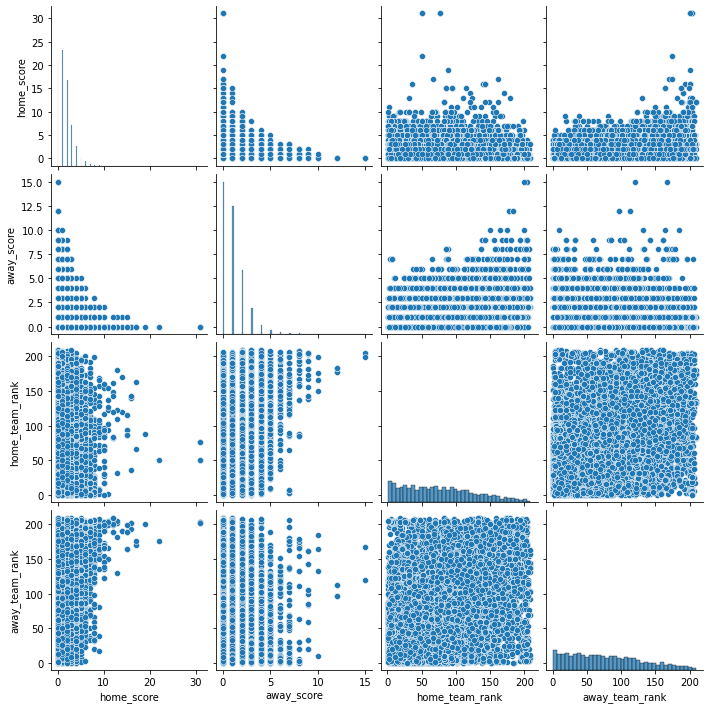

In [ ]:
#Plot pairplots
sns.pairplot(Merged_Games)

plt.show()

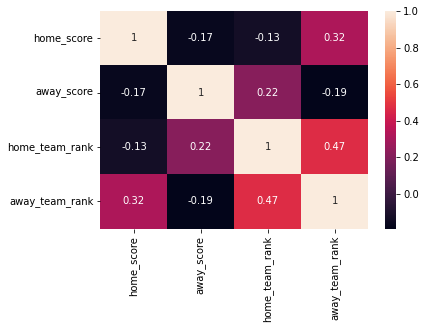

In [ ]:
#Plot a correlation matrix
sns.heatmap(Merged_Games.corr(), annot=True)
plt.show()

There is a weak correlation between the variables.

# 6) Polynomial Regression

The aim is to create a model that predicts the home team and away team results pegged on the rankings and the type of tournament.

## Import Libraries

In [ ]:
#Import libraries
#---
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder 
lb=LabelEncoder()

## Feature selection and Engineering

Feature engineering will enables us to build more complex and interpretable models from any amount of data. 

Feature selection will help limit these features to a manageable number.

In [ ]:
#Create a copy of the dataset
Merged_Games_copy= Merged_Games.copy()
Merged_Games_copy

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank
0,1993-08,Uganda,Tanzania,3,1,Friendly,104,91
1,1993-09,Sierra Leone,Togo,0,0,Other,79,104
2,1993-10,Angola,Zimbabwe,1,1,Other,97,43
3,1993-10,Cameroon,Zimbabwe,3,1,Other,22,43
4,1993-10,Botswana,South Africa,0,2,Friendly,137,95
...,...,...,...,...,...,...,...,...
21758,2018-12,Iraq,Palestine,1,0,Friendly,88,83
21759,2018-12,Afghanistan,Turkmenistan,0,2,Friendly,142,129
21760,2018-12,United Arab Emirates,Kuwait,0,2,Friendly,81,176
21761,2018-12,Yemen,Syria,0,1,Friendly,125,76


In [ ]:
#Feature selection
#---
#Drop the columns that are irrelevant to our regression model
Merged_Games_copy.drop(['date','home_team', 'away_team'], axis=1, inplace=True)

#Preview changes
Merged_Games_copy.head(3)

,home_score,away_score,tournament,home_team_rank,away_team_rank
0,3,1,Friendly,104,91
1,0,0,Other,79,104
2,1,1,Other,97,43


In [ ]:
#Feature Engineering
#---
#Encode the values in tournament column as 1 and 0 
Merged_Games_copy['tournament']=lb.fit_transform(Merged_Games_copy['tournament'].astype(str))

#Preview the changes
print(Merged_Games.tournament.value_counts())
print('****************')
print(Merged_Games_copy.tournament.value_counts())

#1 represents Other while 0 represents friendly

Other       12990
Friendly     8773
Name: tournament, dtype: int64
****************
1    12990
0     8773
Name: tournament, dtype: int64


In [ ]:
#Preview the dataset
Merged_Games_copy. head(3)

,home_score,away_score,tournament,home_team_rank,away_team_rank
0,3,1,0,104,91
1,0,0,1,79,104
2,1,1,1,97,43


## Multicollinearity Test

In [ ]:
#Place the independent variables in one subset
independent_variables = Merged_Games_copy[['tournament', 'home_team_rank', 'away_team_rank']]

#Find the correlations between the variables
correlations = independent_variables.corr()
correlations

,tournament,home_team_rank,away_team_rank
tournament,1.000000,0.086566,0.097802
home_team_rank,0.086566,1.000000,0.470372
away_team_rank,0.097802,0.470372,1.000000


The variables are not strongly correlated to each other as indicated above. However, the correlations will be used to tally each variance inflation factors to check for multicollinearity.